### 2020-12-24

In [12]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras import datasets

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [6]:
image = x_train[0]

In [7]:
image.shape

(28, 28)

In [8]:
x_train.shape

(60000, 28, 28)

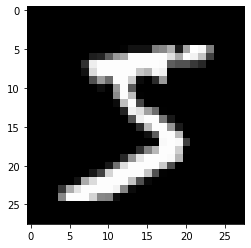

In [10]:
plt.imshow(image,'gray')
plt.show()

In [11]:
image = image[tf.newaxis,...,tf.newaxis]
image.shape

(1, 28, 28, 1)

#### Feature Extraction

In [16]:
tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3),strides=(1,1),padding='SAME',activation='relu')

In [17]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

In [20]:
image.dtype

dtype('uint8')

In [22]:
image = tf.cast(image, dtype = tf.float32)
image.dtype

tf.float32

In [23]:
layer = tf.keras.layers.Conv2D(3,3,1,padding='SAME')
layer

In [26]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [27]:
image.shape, output.shape

(TensorShape([1, 28, 28, 1]), TensorShape([1, 28, 28, 3]))

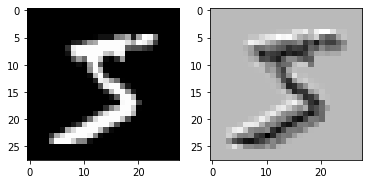

In [29]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')

plt.show()

In [30]:
np.min(output), np.max(output)

(-166.2313, 283.61304)

In [31]:
np.min(image), np.max(image)

(0.0, 255.0)

In [50]:
weigth = layer.get_weights()
len(weigth)

2

In [52]:
weigth[0].shape

(3, 3, 1, 3)

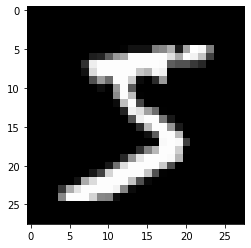

In [35]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

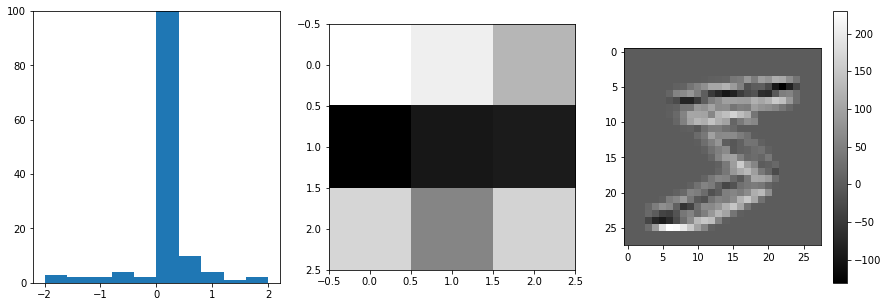

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)

plt.subplot(132)
plt.imshow(weigth[0][:,:,0,1],'gray')

plt.subplot(133)
plt.imshow(output[0,:,:,1],'gray')
plt.colorbar()

plt.show()

In [61]:
tf.keras.layers.ReLU()

In [62]:
act_layers = tf.keras.layers.ReLU()
act_output = act_layers(output)

In [64]:
np.min(act_output), np.max(act_output)

(0.0, 283.61304)

In [66]:
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='SAME')

In [71]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='SAME')
pool_output = pool_layer(act_output)

In [72]:
act_output.shape , pool_output.shape

(TensorShape([1, 28, 28, 3]), TensorShape([1, 14, 14, 3]))

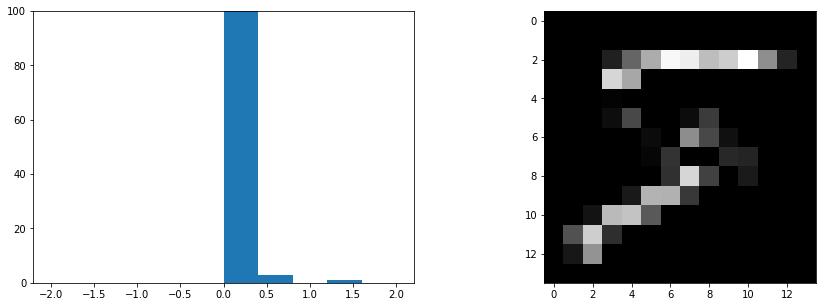

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.imshow(pool_output[0,:,:,0],'gray')

plt.show()

#### Full Connected

In [80]:
tf.keras.layers.Flatten()

In [87]:
layer = tf.keras.layers.Flatten()
flatten = layer(output)

In [89]:
output.shape , flatten.shape

(TensorShape([1, 28, 28, 3]), TensorShape([1, 2352]))

In [90]:
tf.keras.layers.Dense(32,activation='relu')

In [91]:
layer = tf.keras.layers.Dense(32,activation='relu')
output = layer(flatten)

In [93]:
output.shape

TensorShape([1, 32])

In [94]:
layer = tf.keras.layers.Dense(10,activation='relu')
output = layer(output)

In [95]:
output.shape

TensorShape([1, 10])

In [96]:
layer=tf.keras.layers.Dropout(0.7)
output = layer(output)

In [97]:
output

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[  0.       ,  76.81352  , 106.45775  ,   0.       ,   0.       ,
         91.135025 ,   2.3649879,   0.       ,  20.604988 ,   0.       ]],
      dtype=float32)>

In [98]:
output.shape

TensorShape([1, 10])

In [99]:
# summary
from tensorflow.keras import layers

input_shape = (28,28,1)
num_classes = 10

In [105]:
inputs = layers.Input(shape=input_shape)

# feature extration
net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#fully connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='CNN')

In [106]:
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0       